In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv


# ML Based DDoS Detection

In this notebook, we'll analyze a dataset of network traffic to identify patterns, correlations, and underlying structures. We'll also explore dimensionality reduction techniques like PCA and t-SNE.

In [9]:
filename = '/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'

## Exploratory Data Analysis (EDA)
Let's start by exploring the dataset to understand its structure, the types of variables, and any missing values.

### 1. General understanding of the data
We'll start by loading the CSV file and displaying the first few lines to get an overview of the data.

In [8]:
data = pd.read_csv(filename)
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


From the first few rows of the dataset, we can observe several things:

The dataset contains 79 columns.
Each column seems to represent a different characteristic of the data packets, such as Flow Duration, Total Fwd Packets, Total Length of Fwd Packets and so on.
The last column, Label, seems to indicate the traffic classification: here, we see that the first lines are classified as BENIGN.

### 2. Descriptive statistical analysis

We'll generate descriptive statistics for each column to better understand the distribution of data for each characteristic.

In [10]:
# Generate descriptive statistics
descriptive_stats = data.describe()

descriptive_stats

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


Descriptive statistics give us an overview of the distribution of variables in the dataset:

count: number of non-zero observations.
mean: average.
std: standard deviation, which measures the dispersion of the data in relation to the mean.
min: minimum value.
25%: 1st quartile, 25% of data below this value.
50%: median, 50% of data below this value.
75%: 3rd quartile, 75% of data below this value.
max: maximum value.

Some notable observations :

* The average Flow Duration is around 16 million units with a high standard deviation, indicating high variability.
* Most variables appear to have a high standard deviation, indicating a wide dispersion of the data.
* Some variables, such as Flow Duration, have negative minimum values, which could be an anomaly.

### 3. Search for missing values

let's see if we have miising values in our dataset.

In [11]:
# count the number of missing value
missing_values = data.isnull().sum()

# print colums with missing values
missing_values[missing_values > 0]

Flow Bytes/s    4
dtype: int64

It appears that the Flow Bytes/s column contains 4 missing values. This is important information, as missing values can have an impact on subsequent analysis and modeling.
Because there is only 4 missings values, let's delete these rows.

In [13]:
# Removing rows with missing values in the 'Flow Bytes/s' column
data_cleaned = data.dropna(subset=['Flow Bytes/s'])

### 4. Analysis of Distributions
Let's examine the distribution of some of the primary columns, as well as the Label column, which appears to be our target variable.

For this, we will visualize the distributions using histograms.

/tmp/ipykernel_32/2825100623.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/2825100623.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_32/2825100623.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


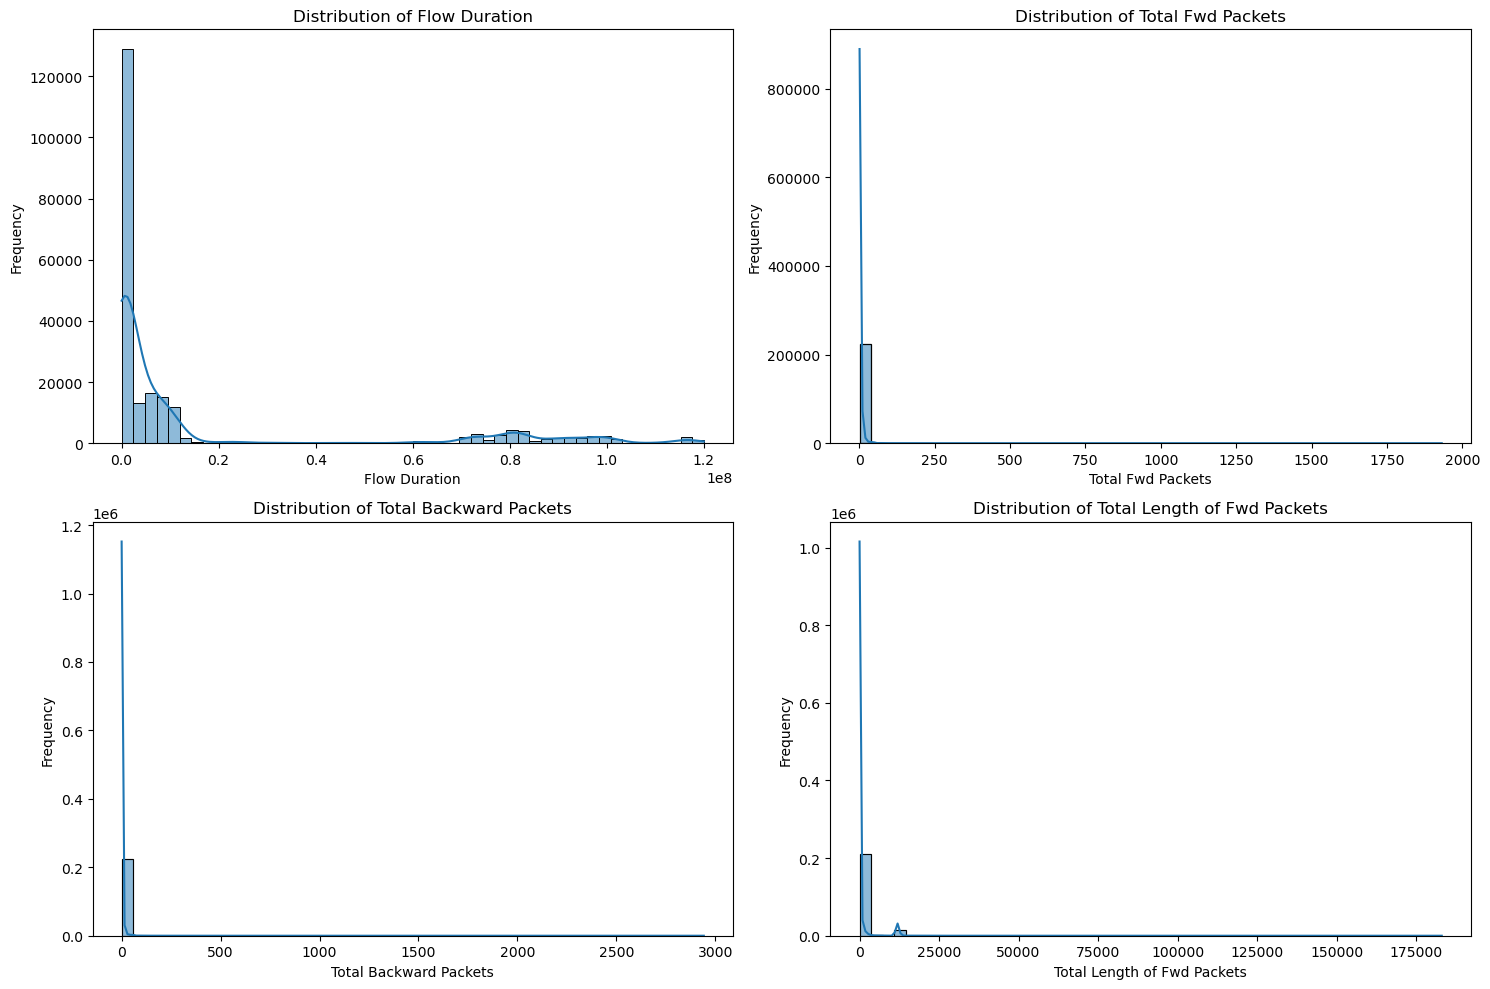

In [19]:

import seaborn as sns

data_cleaned.columns = [col.strip() for col in data_cleaned.columns]

# Columns for visualization
cols_to_visualize = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets']

# Visualizing the distributions of selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_cleaned[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

Here are the distributions of the selected columns:

* Flow Duration: This distribution is heavily right-skewed, indicating that most flows have a short duration, but there are some with extremely long durations.

* Total Fwd Packets: Similar to "Flow Duration", the distribution is heavily right-skewed. Most flows have a small number of packets, but some have a large count.

* Total Backward Packets: This distribution is also right-skewed, with most flows having a small count of backward packets.

* Total Length of Fwd Packets: Once again, the distribution is heavily right-skewed. Most flows have a small packet length, but there are some with extremely high lengths.

Next, let's look at the distribution of the target variable, Label.

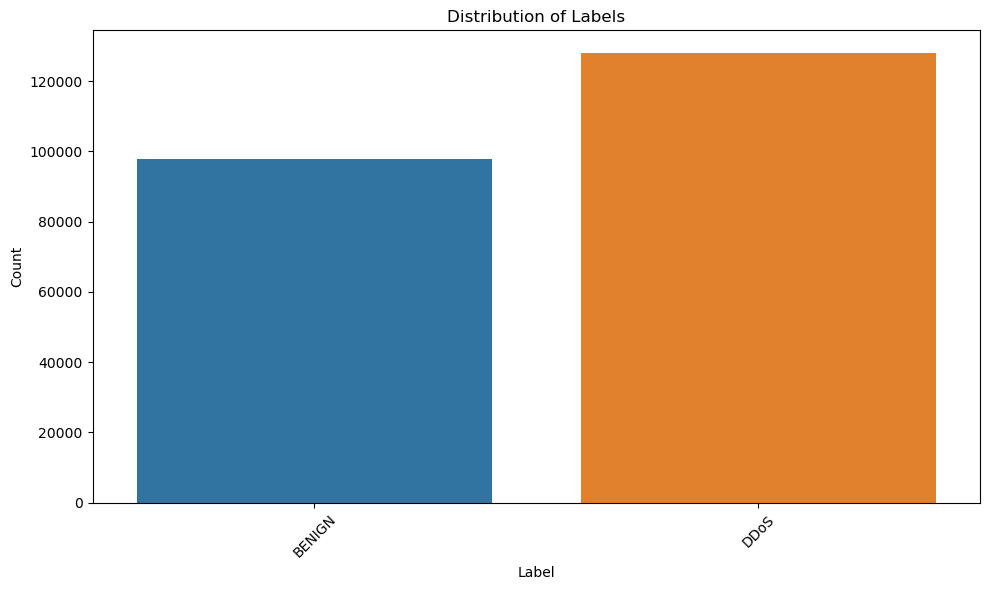

In [21]:
# Visualizing the distribution of the target variable 'Label'
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Label')
plt.title('Distribution of Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The distribution of the labels shows that the majority of observations are classified as "DDOS". However, there's also a significant number of observations labeled as "BENIGN". This indicates that the dataset contains both normal (benign) and malicious (DDoS) observations and is a bit unbalanced.

### 5. Correlation Analysis

Let's see how the features correlate with one another. A high correlation between two features might indicate redundancy, and considering this information could be useful for modeling later on.

We'll visualize the correlation matrix using a heatmap. We can not vizualise the heatmap of all the variables, so we will select the one that can be important with the help of our cybersecurity knowledge.

In the general context of DDoS attacks, here are some of the characteristics that are often considered important:

* Flow Duration: The duration of a flow can help differentiate legitimate traffic from malicious traffic. For example, a large number of flows of short duration may indicate a DDoS attack.

* Total Fwd Packets and Total Backward Packets: An abnormally high number of packets in a flow could be indicative of an attack, particularly if the number of packets sent (fwd) is disproportionate to the number received (backward).

* Packet Length (as in Total Length of Fwd Packets): Unusual variations in packet length can also be a sign of malicious activity.

* Flow Rate: A sudden increase in throughput may indicate network flooding, typical of DDoS attacks.

* Flow Bytes/s: A sudden increase in throughput in bytes per second can be another indicator of flooding.

* Protocols: Some protocols may be more commonly exploited for DDoS attacks than others.

/tmp/ipykernel_32/2361336912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Label_numeric'] = data_cleaned['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


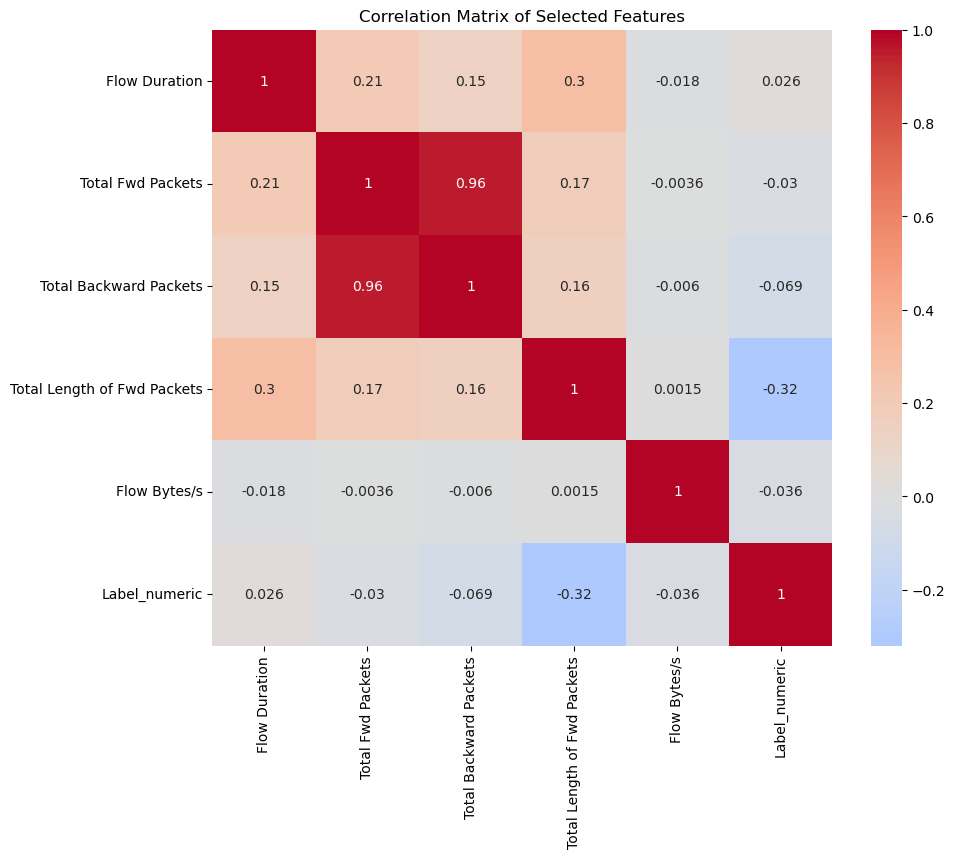

In [27]:
# Converting labels to numeric for correlation
data_cleaned['Label_numeric'] = data_cleaned['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Selecting the important columns for correlation analysis
important_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Flow Bytes/s', 'Label_numeric']


# Computing the correlation matrix
correlation_matrix = data_cleaned[important_cols].corr()

# Displaying the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

Here's the heatmap showing the correlation matrix of the important features for DDoS detection:

* The diagonal, as expected, has a correlation of 1 since any variable is perfectly correlated with itself.
* The feature Flow Duration has a negative correlation with the Label_numeric (our DDoS indicator), suggesting that shorter flow durations might be indicative of DDoS attacks.
* Other features also show varying degrees of correlation with the target.
It's important to remember that correlation does not imply causation. 


Now we'll plot the features most positively and negatively correlated with our labels.
This will help for:

* Visual Clarity: The color-coded representation allows for a quick and clear overview of the relationships between variables. Darker or lighter shades immediately highlight strong correlations, making it easier to identify patterns at a glance.

* Identify Key Features: By examining the heatmap, we can pinpoint which features are most strongly correlated (either positively or negatively) with the target variable (Label_numeric in our case). This helps in feature selection and prioritization for modeling.

* Contextual Understanding: In the domain of cybersecurity, understanding how certain features relate to the likelihood of a DDoS attack can provide context and deeper insights into the nature of the attacks and the patterns they follow.

/tmp/ipykernel_32/1327240084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_with_target = data_cleaned.corr()['Label_numeric'].sort_values(ascending=False)


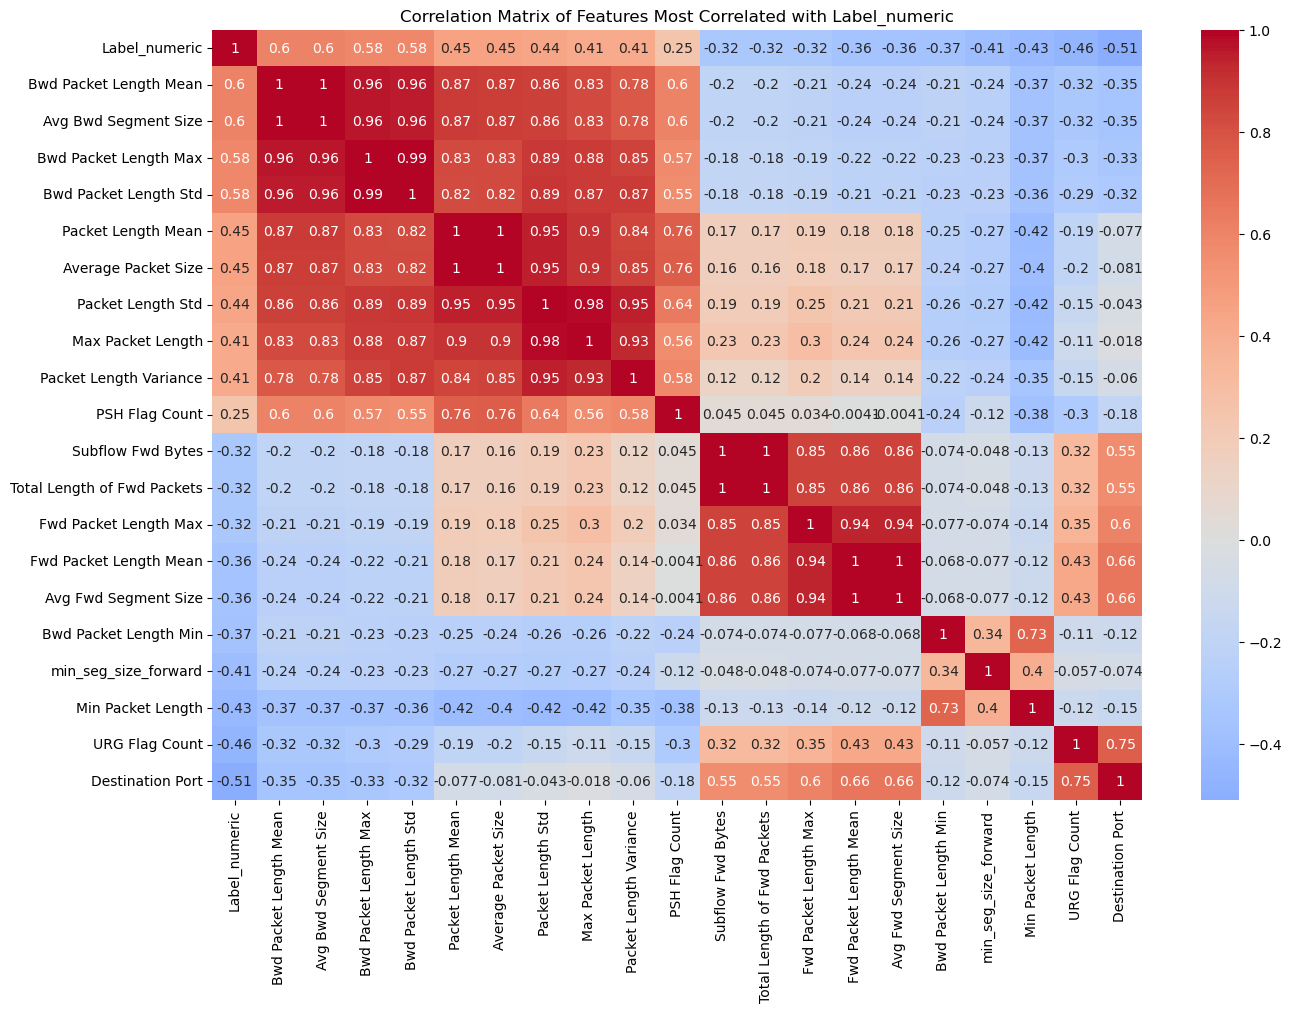

In [38]:
# Calculate correlation coefficients with 'Label_numeric'
correlations_with_target = data_cleaned.corr()['Label_numeric'].sort_values(ascending=False)

# Select the top positively correlated and top negatively correlated features
# We'll select the top 10 features for visualization, but this number can be adjusted
top_positive_correlations = correlations_with_target.head(11)  # Exclude the correlation of 'Label_numeric' with itself
top_negative_correlations = correlations_with_target[correlations_with_target < 0].tail(10)

# Combine the selected features
selected_features = top_positive_correlations.index.tolist() + top_negative_correlations.index.tolist()

# Compute the correlation matrix for the selected features
selected_correlation_matrix = data_cleaned[selected_features].corr()

# Display the heatmap for the selected features
plt.figure(figsize=(15, 10))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features Most Correlated with Label_numeric')
plt.show()

Let's interpret the heatmap:

* Bwd Packet Length Mean, Avg Bwd Segment Size, Bwd Packet Length Max, Bwd Packet Length Std: These features relate to the length of backward packets. All of them show strong positive correlations with Label_numeric. This suggests that when these features increase in value, it's more likely to be a DDoS attack. For instance, larger packet lengths in DDoS attacks might be due to attackers trying to consume bandwidth.

* Packet Length Mean, Average Packet Size, Packet Length Std, Max Packet Length, Packet Length Variance: These features describe the overall packet lengths in the network flow. They have strong positive correlations with Label_numeric. This indicates that abnormal packet lengths or variations in packet lengths might be indicative of DDoS attacks.

* PSH Flag Count: This feature shows a positive correlation with Label_numeric. The PSH flag in TCP headers informs the receiving host that the data should be pushed up to the application as soon as possible. A high count might suggest an attempt to overwhelm the application layer in the target system.

* Subflow Fwd Bytes, Total Length of Fwd Packets, Fwd Packet Length Max, Fwd Packet Length Mean, Avg Fwd Segment Size: These features are related to the length and size of forward packets. They are positively correlated with Label_numeric, suggesting that higher values for these features might be associated with DDoS attacks.

* Bwd Packet Length Min, min_seg_size_forward, Min Packet Length: These features relate to the minimum sizes of packets and segments. Their correlations with Label_numeric are weaker, suggesting that they might be less indicative of DDoS attacks on their own.

* URG Flag Count: This feature has a positive correlation with Label_numeric. The URG flag in TCP headers indicates that the data in the packet is urgent and should be processed immediately. A high count of urgent flags might suggest malicious intent, such as an attacker trying to disrupt normal processing.

* Destination Port: This feature has a strong negative correlation with Label_numeric. This suggests that certain destination ports might be more commonly targeted in DDoS attacks. Alternatively, commonly used ports (like port 80 for HTTP) might see more benign traffic, resulting in the negative correlation.

In summary, the heatmap provides insights into how each feature relates to the likelihood of the traffic being a DDoS attack. Features with strong positive correlations increase the likelihood of a DDoS attack as their values increase, while features with strong negative correlations decrease the likelihood of a DDoS attack as their values increase.